In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
batch_size = 100
z_dimension = 10

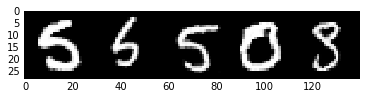

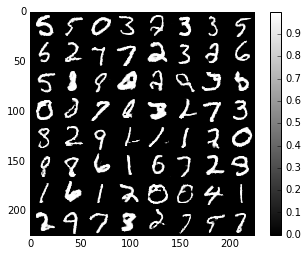

In [3]:
trained_graph_path = "./TrainedModel/trained_graph.pb"

with tf.Graph().as_default() as this_graph:
    trained_graph = tf.GraphDef()
    with open(trained_graph_path, "rb") as f:
        trained_graph.ParseFromString(f.read())
        tf.import_graph_def(trained_graph, name="")

    with tf.Session() as sess:
       
        sampled_zs = np.random.uniform( -1, 1, size=(batch_size, z_dimension) ).astype( np.float32 )
        
        output_node = sess.graph.get_tensor_by_name("model/generator/D2/output_node:0")
        sample_images = sess.run(output_node, feed_dict={"model/generator/input_node:0": sampled_zs})
        sample_images = sample_images[0:64,:]
        
        plt.imshow(np.hstack(sample_images[0:5].reshape(5, 28, 28)), interpolation='nearest', cmap=matplotlib.cm.gray)
        plt.show()

        tiles = []
        for i in range(0,8):
            tiles.append( np.reshape( sample_images[i*8:(i+1)*8,:], [28*8,28] ) )
        plt.imshow( np.hstack(tiles), interpolation='nearest', cmap=matplotlib.cm.gray )
        plt.colorbar()
        plt.show()